In [1]:
import pandas as pd
import numpy as np
%display typeset

# Modelo proposto: SEIARQ

In [18]:
def model(t,y,params):
        S, E, I, A, M,R = y
        rho, beta, gamma, alpha, chi, alfa, theta, mu, N = params
        
        if t > 120:
            chi = 0
        return [
            -beta*(1-chi)*S*I + mu*R,#  dS/dt
            #chi*S, #dQ/dt Quarentenados acumulados
            beta*(1-chi)*S*I - (theta)*E, #dE/dt
            (1-alpha)*theta*E - gamma*I - rho*I,# dI/dt
            alpha*theta*E - delta*A, #dA/dt
            gamma*I, #dM/dt Mortes acumuladas
            rho*I + delta*A - mu*R #dR/dt
        ]

In [19]:
#parametros
rho=0.19
beta =0.87
gamma =0.04
chi =0.10
alpha=0.25
theta=0.70
delta=0.38
mu=0.83
N=10.28e6

In [20]:
T = ode_solver()
T.function = model
T.algorithm = "rk8pd"
inits = [.99,0,1e-4,0,0,0]
tspan = [0,200]
T.ode_solve(tspan, inits, num_points=200, params = [rho, beta, gamma, chi,alpha,theta,delta,mu, N])

In [21]:
def get_sim_array(sol):
    sim = np.array([y for t,y in sol])
    return sim
get_sim_array(T.solution)


array([[9.90000000e-01, 0.00000000e+00, 1.00000000e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [9.89946092e-01, 4.94332019e-05, 8.79602469e-05, 8.99446855e-07,
        3.69421919e-06, 1.19211389e-05],
       [9.89901331e-01, 8.12862053e-05, 9.03074518e-05, 2.74049662e-06,
        7.22533655e-06, 1.71094031e-05],
       ...,
       [2.53784452e-01, 1.71335946e-02, 2.79209309e-02, 1.80936825e-03,
        6.82052374e-01, 7.39928041e-03],
       [2.53761673e-01, 1.67909464e-02, 2.73642474e-02, 1.77324000e-03,
        6.83158041e-01, 7.25185202e-03],
       [2.53739950e-01, 1.64549900e-02, 2.68183225e-02, 1.73781363e-03,
        6.84241657e-01, 7.10726629e-03]])

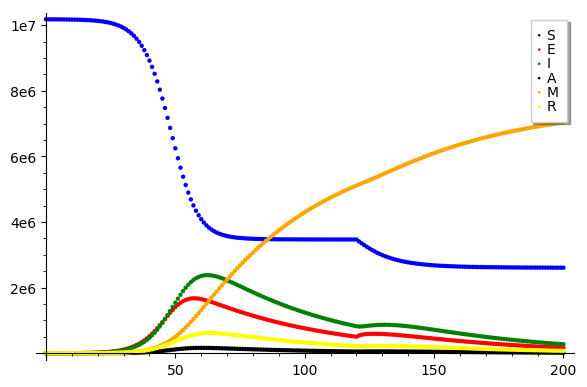

In [22]:
popPT=N
def plot_sol(sol):
    sim = get_sim_array(sol)*popPT
    P = list_plot(sim[:,0],legend_label='S')
    colors = ['blue','red','green','black','orange','yellow']
    for i,var in enumerate(['E','I','A', 'M','R']):
        P += list_plot(sim[:,i+1],color=colors[i+1],legend_label=var)
   
    show(P)
plot_sol(T.solution)

# Obtendo os dados

In [7]:
df = pd.read_csv("owid-covid-data.csv")
only_pt = df["location"] == "Portugal"
df = df[only_pt]
html(df.head().to_html())

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
41453,PRT,Europe,Portugal,2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.930,0.876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.847
41454,PRT,Europe,Portugal,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.930,0.876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.847
41455,PRT,Europe,Portugal,2020-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.876,1.557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.847
41456,PRT,Europe,Portugal,2020-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.876,1.557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.847
41457,PRT,Europe,Portugal,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.829,2.141,25.0,25.0,0.002,0.002,NaN,NaN,NaN,NaN,tests performed (incl. non-PCR),11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.847


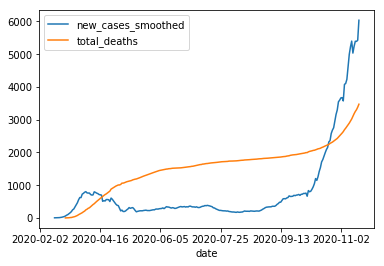

In [8]:
df.set_index('date')[['new_cases_smoothed','total_deaths']].plot()

In [12]:
import sherpa

ModuleNotFoundError: No module named 'sherpa'